<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_2_8)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.8_n20.csv',
 'data_add_delta_-2.8_n30.csv',
 'data_add_delta_-2.8_n60.csv',
 'data_add_delta_-2.8_n120.csv',
 'data_add_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,89.026740,98.711073,0.000722,197.738535,197.736770,0.001765
1,0.0,1.0,48.951923,65.847182,-0.001178,124.797927,124.799706,-0.001779
2,0.0,2.0,70.084038,79.462703,0.007058,159.553799,159.546504,0.007294
3,0.0,3.0,86.439569,53.904629,-0.000229,150.343969,150.343598,0.000371
4,0.0,4.0,93.134129,23.047302,0.006035,126.187465,126.180841,0.006623
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,87.019535,43.588531,-0.001347,140.606718,140.608982,-0.002264
249996,999.0,246.0,28.661058,62.085564,-0.000278,100.746344,100.746768,-0.000423
249997,999.0,247.0,26.470430,51.630176,0.001769,88.102375,88.100820,0.001555
249998,999.0,248.0,48.401284,80.516380,-0.000075,138.917589,138.917854,-0.000264


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,89.026740,98.711073,0.000722,197.738535,197.736770,0.001765
1,0.0,1.0,48.951923,65.847182,-0.001178,124.797927,124.799706,-0.001779
2,0.0,2.0,70.084038,79.462703,0.007058,159.553799,159.546504,0.007294
3,0.0,3.0,86.439569,53.904629,-0.000229,150.343969,150.343598,0.000371
4,0.0,4.0,93.134129,23.047302,0.006035,126.187465,126.180841,0.006623
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,87.019535,43.588531,-0.001347,140.606718,140.608982,-0.002264
249996,999.0,246.0,28.661058,62.085564,-0.000278,100.746344,100.746768,-0.000423
249997,999.0,247.0,26.470430,51.630176,0.001769,88.102375,88.100820,0.001555
249998,999.0,248.0,48.401284,80.516380,-0.000075,138.917589,138.917854,-0.000264


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    89.026740  98.711073  0.000722  197.738535  197.736770  0.001765
      1.0    48.951923  65.847182 -0.001178  124.797927  124.799706 -0.001779
      2.0    70.084038  79.462703  0.007058  159.553799  159.546504  0.007294
      3.0    86.439569  53.904629 -0.000229  150.343969  150.343598  0.000371
      4.0    93.134129  23.047302  0.006035  126.187465  126.180841  0.006623
...                ...        ...       ...         ...         ...       ...
999.0 245.0  87.019535  43.588531 -0.001347  140.606718  140.608982 -0.002264
      246.0  28.661058  62.085564 -0.000278  100.746344  100.746768 -0.000423
      247.0  26.470430  51.630176  0.001769   88.102375   88.100820  0.001555
      248.0  48.401284  80.516380 -0.000075  138.917589  138.917854 -0.000264
      249.0  33.831134  71.350855  0.002195  115.184184  115.182107  0.002077

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    89.026740  98.711073  0.000722  197.738535  197.736770  0.001765
      1.0    48.951923  65.847182 -0.001178  124.797927  124.799706 -0.001779
      2.0    70.084038  79.462703  0.007058  159.553799  159.546504  0.007294
      3.0    86.439569  53.904629 -0.000229  150.343969  150.343598  0.000371
      4.0    93.134129  23.047302  0.006035  126.187465  126.180841  0.006623
...                ...        ...       ...         ...         ...       ...
999.0 245.0  87.019535  43.588531 -0.001347  140.606718  140.608982 -0.002264
      246.0  28.661058  62.085564 -0.000278  100.746344  100.746768 -0.000423
      247.0  26.470430  51.630176  0.001769   88.102375   88.100820  0.001555
      248.0  48.401284  80.516380 -0.000075  138.917589  138.917854 -0.000264
      249.0  33.831134  71.350855  0.002195  115.184184  115.182107  0.002077

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,89.026740,98.711073,0.000722,197.738535,197.736770,0.001765
1,0.0,1.0,48.951923,65.847182,-0.001178,124.797927,124.799706,-0.001779
2,0.0,2.0,70.084038,79.462703,0.007058,159.553799,159.546504,0.007294
3,0.0,3.0,86.439569,53.904629,-0.000229,150.343969,150.343598,0.000371
4,0.0,4.0,93.134129,23.047302,0.006035,126.187465,126.180841,0.006623
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,87.019535,43.588531,-0.001347,140.606718,140.608982,-0.002264
249996,999.0,246.0,28.661058,62.085564,-0.000278,100.746344,100.746768,-0.000423
249997,999.0,247.0,26.470430,51.630176,0.001769,88.102375,88.100820,0.001555
249998,999.0,248.0,48.401284,80.516380,-0.000075,138.917589,138.917854,-0.000264


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    89.026740  98.711073  0.000722  197.738535  197.736770  0.001765
      1.0    48.951923  65.847182 -0.001178  124.797927  124.799706 -0.001779
      2.0    70.084038  79.462703  0.007058  159.553799  159.546504  0.007294
      3.0    86.439569  53.904629 -0.000229  150.343969  150.343598  0.000371
      4.0    93.134129  23.047302  0.006035  126.187465  126.180841  0.006623
...                ...        ...       ...         ...         ...       ...
999.0 245.0  87.019535  43.588531 -0.001347  140.606718  140.608982 -0.002264
      246.0  28.661058  62.085564 -0.000278  100.746344  100.746768 -0.000423
      247.0  26.470430  51.630176  0.001769   88.102375   88.100820  0.001555
      248.0  48.401284  80.516380 -0.000075  138.917589  138.917854 -0.000264
      249.0  33.831134  71.350855  0.002195  115.184184  115.182107  0.002077

[250000 rows x 6 columns]

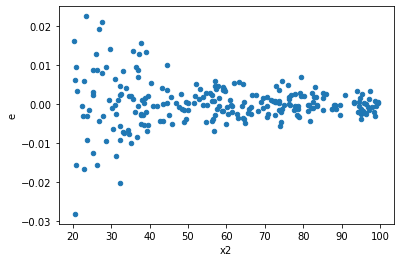

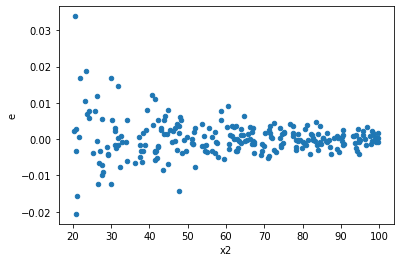

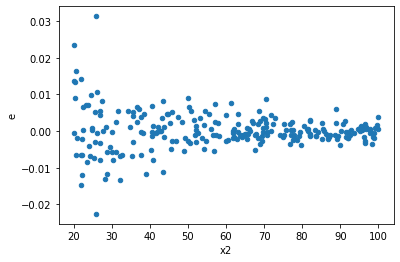

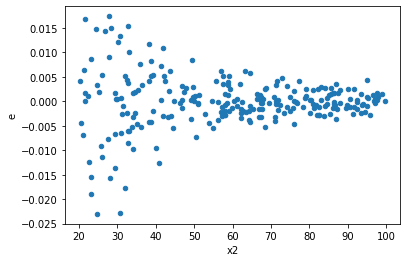

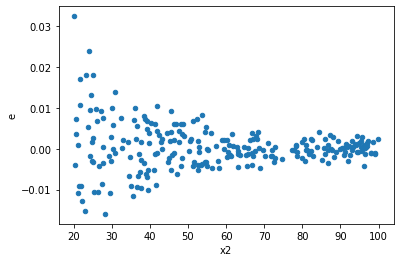

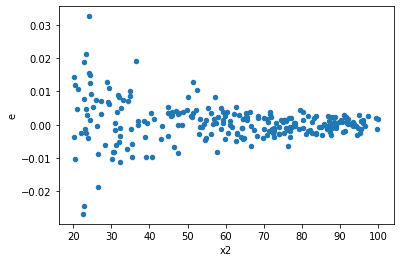

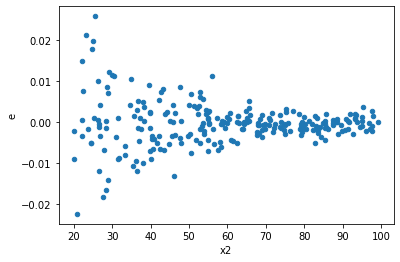

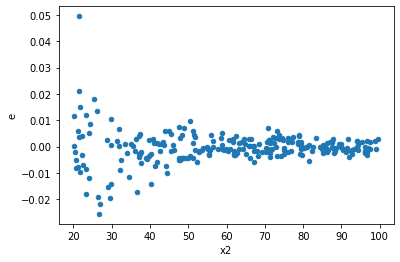

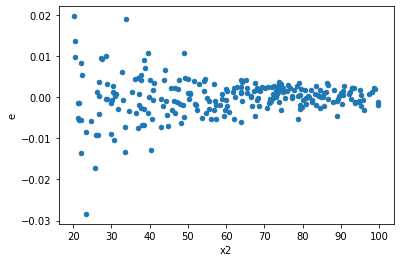

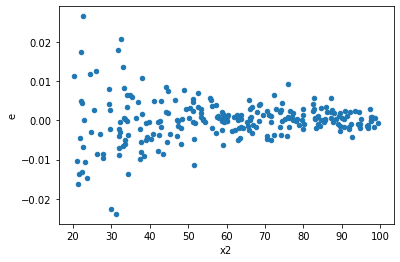

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,0.005367956127157433,0.0013391664511514204,5.477506252201462e-05,1.3664963787259392e-05,0.24947417963726307,3.936542361043026e-11,Reject001=0 : Heteroscedasticity
1.0,98.0,98.0,0.004668706601017702,0.0007723376229317476,4.763986327569083e-05,7.880996152364771e-06,0.1654286055935472,5.539497713425881e-17,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,0.005300241465591771,0.0006600999853436759,5.408409658767113e-05,6.735714136159959e-06,0.1245414929921454,1.5378398137422487e-21,Reject001=0 : Heteroscedasticity
3.0,98.0,98.0,0.006100022378730602,0.0005626877356918195,6.224512631357757e-05,5.741711588692036e-06,0.09224355268823019,1.0259827820249964e-26,Reject001=0 : Heteroscedasticity
4.0,98.0,98.0,0.005474050040065764,0.0008385668470055592,5.585765347005882e-05,8.556804561281217e-06,0.15318947413120193,3.5203693595079045e-18,Reject001=0 : Heteroscedasticity
5.0,98.0,98.0,0.006755490345478565,0.0007269849570839125,6.89335749538629e-05,7.4182138477950255e-06,0.10761394360817671,5.118836396172271e-24,Reject001=0 : Heteroscedasticity
6.0,98.0,98.0,0.005012674463896903,0.0007046040757311429,5.114973942751941e-05,7.189837507460642e-06,0.1405644992121385,1.4927265025789572e-19,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,0.0079306139734679,0.000879370878371818,8.09246323823255e-05,8.973172228283857e-06,0.11088307681016615,1.672491227873999e-23,Reject001=0 : Heteroscedasticity
8.0,98.0,98.0,0.003919400838825522,0.0005680358682377462,3.999388611046451e-05,5.79628436977292e-06,0.1449292612816714,4.63335752798201e-19,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    999
Reject001=1 : Homoscedasticity        1
Name: Result_test, dtype: int64